In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mlp
#verify mlp

In [96]:
df = pd.read_excel('sales.xlsx')

In [97]:
df.head(3)

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza


In [98]:
df.shape

(48620, 12)

In [99]:
df.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [100]:
df.dtypes

order_details_id              int64
order_id                      int64
pizza_id                     object
quantity                      int64
order_date           datetime64[ns]
order_time                   object
unit_price                  float64
total_price                 float64
pizza_size                   object
pizza_category               object
pizza_ingredients            object
pizza_name                   object
dtype: object

# Questions

## 2. Informations de base :

a. Combien de pizzas uniques (pizza_id distincts) y a-t-il dans le jeu de
données ?

In [101]:

df.pizza_id.value_counts().count()

91

b.  Combien de commandes uniques (order_id distincts) figurent dans le jeu
de données ?

In [102]:
df.order_id.value_counts().count()

21350

## 3. Analyse temporelle :

a. Quelle est la plage de dates dans le jeu de données ?

In [103]:
print(f"plage de dates : {df['order_date'].min()} to {df['order_date'].max()}")

plage de dates : 2015-01-01 00:00:00 to 2015-12-31 00:00:00


b. Combien de commandes ont été passées chaque jour ?

In [104]:
df.groupby('order_date')['order_id'].count()

order_date
2015-01-01    161
2015-01-02    160
2015-01-03    154
2015-01-04    106
2015-01-05    121
             ... 
2015-12-27     87
2015-12-28    102
2015-12-29     77
2015-12-30     73
2015-12-31    171
Name: order_id, Length: 358, dtype: int64

c. Quelle est la durée moyenne pour traiter une commande ?

C'est une question piège nous n'avons aucun moyen de calculer correctement cette valeur, il faudrait que le Dataframe contienne une colonne order_processed ou autre pour pouvoir faire ce calcul.

Une très mauvaise solution serait de calculer la différence de temps passée entre chaque commandes triées par order_id (1 et 2 par ex) pour essayer de trouver cette valeur. Cela ne serait pas très pertinent car les résultats ne seront pas nécessairement représentatif du temps que Jo va prendre pour traiter une commande, et si il prend une pause, qu'il n'a pas de clients pendant un moment ou ferme la pizzaria après une commande, le calcul va considérer cela comme du temps de préparation de la commande et fausser les résultats

## 4. Analyse de la quantité :

a. Quelle est la quantité moyenne de pizzas commandées ?

In [105]:
df.groupby('order_id')['quantity'].sum().mean()

2.321967213114754

Values Check

In [106]:
# You can check the results here
# df.quantity.value_counts()
# df[df.quantity == 4]
# df.groupby('order_id')['quantity'].sum()[5264]
# df[df.order_id == 5264]

b. Quelle est la taille de pizza la plus fréquemment commandée ?

In [107]:
df.pizza_size.value_counts()

pizza_size
L      18526
M      15385
S      14137
XL       544
XXL       28
Name: count, dtype: int64

In [108]:
df.pizza_size.value_counts().index[0]

'L'

c. Quelle est la catégorie de pizza la plus fréquemment commandée ?

In [109]:
df.pizza_category.value_counts()

pizza_category
Classic    14579
Supreme    11777
Veggie     11449
Chicken    10815
Name: count, dtype: int64

In [110]:
df.pizza_category.value_counts().index[0]

'Classic'

## 5. Analyse des prix :

a. Quel est le prix unitaire moyen des pizzas ?

In [111]:
df.apply(lambda x: x['total_price'] / x['quantity'], axis=1).mean().round(2)


16.49

b. Quel est le prix total moyen d'une commande ?

In [112]:
df.groupby('order_id')['total_price'].sum().mean().round(2)

38.31

c. Quelle pizza a le prix unitaire le plus élevé ?

In [113]:
# Je vérifies d'abord qu'il y a bien une seule pizza qui à le prix le plus élevé
df[df.unit_price == df.unit_price.max()]['pizza_name'].value_counts().count()

# ceci donne le bon nom de pizza mais on peut faire un peu mieux (case en dessous)
# df[df.unit_price == df.unit_price.max()]['pizza_name'].value_counts()[0]

1

In [114]:
# plus fluide :
df[df.unit_price == df.unit_price.max()].iloc[0]['pizza_name']

'The Greek Pizza'

## 6. Répartition par taille et catégorie :

a. Combien de pizzas de chaque taille ont été vendues ?

In [115]:
df.groupby('pizza_size')['quantity'].sum()

pizza_size
L      18956
M      15635
S      14403
XL       552
XXL       28
Name: quantity, dtype: int64

b. Combien de pizzas y a-t-il dans chaque catégorie ?

In [116]:
df.groupby('pizza_category')['pizza_name'].nunique()

pizza_category
Chicken    6
Classic    8
Supreme    9
Veggie     9
Name: pizza_name, dtype: int64

In [117]:
# Une bien pire façon de l'afficher
df.groupby('pizza_category')['pizza_name'].value_counts().index

MultiIndex([('Chicken',                 'The Barbecue Chicken Pizza'),
            ('Chicken',                     'The Thai Chicken Pizza'),
            ('Chicken',               'The California Chicken Pizza'),
            ('Chicken',                'The Southwest Chicken Pizza'),
            ('Chicken',                  'The Chicken Alfredo Pizza'),
            ('Chicken',                    'The Chicken Pesto Pizza'),
            ('Classic',                   'The Classic Deluxe Pizza'),
            ('Classic',                         'The Hawaiian Pizza'),
            ('Classic',                        'The Pepperoni Pizza'),
            ('Classic',                         'The Big Meat Pizza'),
            ('Classic',                       'The Napolitana Pizza'),
            ('Classic',                'The Italian Capocollo Pizza'),
            ('Classic',                            'The Greek Pizza'),
            ('Classic', 'The Pepperoni, Mushroom, and Peppers Pizza'),
      

## 7. Analyse des ingrédients :

a. Quels sont les ingrédients les plus couramment utilisés dans toutes les
pizzas ?


In [118]:
# avoiding repeating operation error by checking if last element of the
# column has already been converted to a list instead of string
if not isinstance(df.pizza_ingredients[df.pizza_ingredients.shape[0]-1], list):
    # cleaning list of ingredients
    df.pizza_ingredients = df.pizza_ingredients.apply(lambda x : x.split(', '))
ingredients_count = dict(df.pizza_ingredients.explode().value_counts())
ingredients_count

{'Garlic': 27422,
 'Tomatoes': 26601,
 'Red Onions': 19547,
 'Red Peppers': 16284,
 'Mozzarella Cheese': 10333,
 'Pepperoni': 10300,
 'Spinach': 10012,
 'Mushrooms': 9624,
 'Chicken': 8443,
 'Capocollo': 6572,
 'Green Olives': 6174,
 'Artichokes': 5682,
 'Jalapeno Peppers': 5643,
 'Green Peppers': 5224,
 'Feta Cheese': 4748,
 'Pineapple': 4685,
 'Bacon': 4227,
 'Asiago Cheese': 3342,
 'Cilantro': 3341,
 'Corn': 3341,
 'Chipotle Sauce': 3341,
 'Goat Cheese': 3301,
 'Kalamata Olives': 3269,
 'Fontina Cheese': 3259,
 'Pesto Sauce': 2893,
 'Zucchini': 2485,
 'Barbecued Chicken': 2372,
 'Barbecue Sauce': 2372,
 'Sliced Ham': 2370,
 'Thai Sweet Chilli Sauce': 2315,
 'Artichoke': 2302,
 'Gouda Cheese': 2302,
 'Onions': 1887,
 'Luganega Sausage': 1887,
 'Coarse Sicilian Salami': 1887,
 'Peperoncini verdi': 1887,
 'Sun-dried Tomatoes': 1880,
 'Gorgonzola Piccante Cheese': 1850,
 'Parmigiano Reggiano Cheese': 1850,
 'Ricotta Cheese': 1850,
 'Calabrese Salami': 1849,
 'Chorizo Sausage': 1811,
 'I

b. Combien de pizzas contiennent un ingrédient spécifique (par exemple,
pepperoni, champignons) ?

In [138]:
# Pour Trois ingrédients au hasard
print(ingredients_count['Garlic'])
print(ingredients_count['Asiago Cheese'])
print(ingredients_count['Prosciutto'])


27422
3342
480


In [121]:
# En Bonus éventuellement
# def HowManyPizzsUseThisIngredient(df, ingredient):




# HowManyPizzsUseThisIngredient(df, 'Pineapple)

## 8. Détails de la commande :

a. Quelle est la répartition du nombre de pizzas par commande ?

In [122]:
df.groupby('order_id')['pizza_name'].count().value_counts().reset_index()\
    .rename(columns={'pizza_name': 'Nombre de pizzas par commande'})

,Nombre de pizzas par commande,count
0,1,8201
1,2,6196
2,3,3325
3,4,2888
4,5,144
5,8,83
6,6,75
7,7,75
8,12,71
9,11,69


b. Quelle est la répartition des prix totaux pour les commandes ?

9.75
83.0


<Axes: xlabel='total_price', ylabel='Count'>

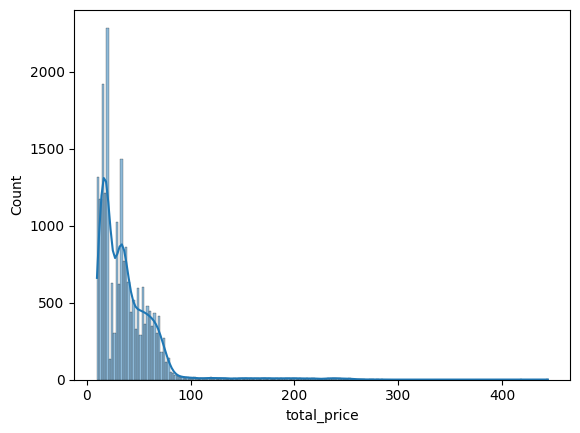

In [191]:
print(df.total_price.min())
print(df.total_price.max())
sns.histplot(df.groupby('order_id')['total_price'].sum(), kde=True)


# df.groupby('order_id')['total_price'].sum().groupby(values)

In [160]:
# Si cette donnée nous intéresse réellement, il me parait plus judicieux de classifier les commandes dans une nouvelle colonne
# par tranches de prix totaux des commandes. ici 4 choisit arbitrairement.

df['total_price_quartile'] = pd.qcut(df['total_price'], q=[0, 0.25, 0.5, 0.75, 1],
    labels=['small_order', 'low_medium_order', 'high_medium_order', 'big_order'])

df[['total_price', 'total_price_quartile']].head()
# price_quartile_distribution = df['total_price_quartile'].value_counts().reset_index()
# price_quartile_distribution


,total_price,total_price_quartile
0,13.25,low_medium_order
1,16.00,low_medium_order
2,18.50,high_medium_order
3,20.75,big_order
4,16.00,low_medium_order


<Axes: >

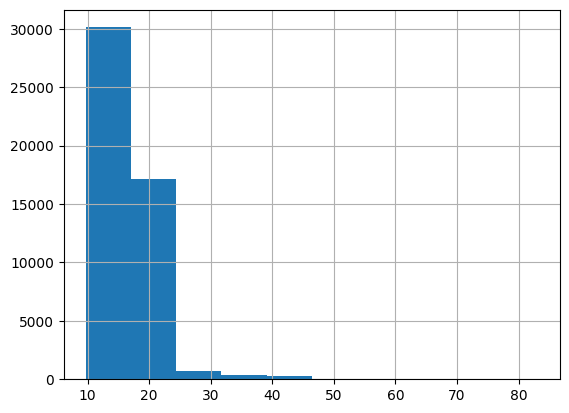

In [172]:
df.total_price.hist()

<Axes: xlabel='total_price', ylabel='Count'>

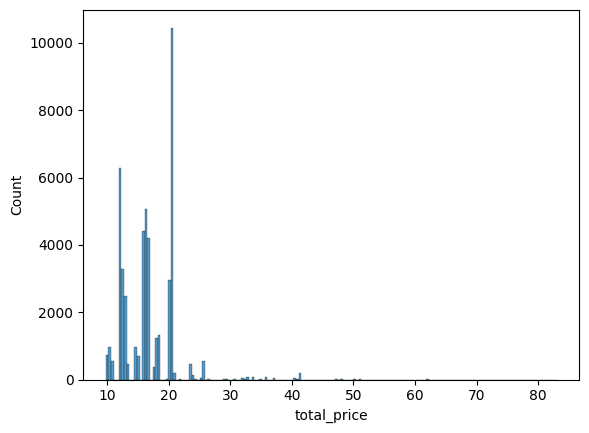

In [173]:
sns.histplot(df.total_price)


In [164]:
df.total_price.describe()

count    48620.000000
mean        16.821474
std          4.437398
min          9.750000
25%         12.750000
50%         16.500000
75%         20.500000
max         83.000000
Name: total_price, dtype: float64

In [129]:
# Bonus perso si j'ai le temps de faire une répartition plus équilibrée

## 9. Analyse du chiffre d’affaires en fonction du temps :

a. Quel est le chiffre d'affaires quotidien ?


b. Y a-t-il une corrélation entre l'heure de la journée et le total de la
commande ?

## 10.Pizzas populaires :

a. Quelles sont les 5 pizzas les plus commandées en quantité ?

b. Quelles sont les 5 pizzas les plus commandées en termes de chiffre
d'affaires ?

## 11.Chiffre d'affaires par taille et catégorie :

a. Quelle est la répartition du chiffre d'affaires pour chaque taille de pizza ?

b. Quelle est la répartition du chiffre d'affaires pour chaque catégorie de
pizza ?

## 12.Corrélation entre prix et quantité :

a. Y a-t-il une corrélation entre le prix unitaire et la quantité commandée ?

b. Quel est le prix unitaire moyen pour différentes tailles de pizza ?

## 13.Tendances saisonnières :

a. Y a-t-il des tendances saisonnières dans les commandes de pizza ?

b. Y a-t-il une corrélation entre le jour de la semaine et la quantité de
commandes ?

In [130]:
# 5. Analyse des prix :
# a. Quel est le prix unitaire moyen des pizzas ?
# b. Quel est le prix total moyen d'une commande ?
# c. Quelle pizza a le prix unitaire le plus élevé ?
# 6. Répartition par taille et catégorie :
# a. Combien de pizzas de chaque taille ont été vendues ?
# b. Combien de pizzas y a-t-il dans chaque catégorie ?
# 7. Analyse des ingrédients :
# a. Quels sont les ingrédients les plus couramment utilisés dans toutes les
# pizzas ?
# b. Combien de pizzas contiennent un ingrédient spécifique (par exemple,
# pepperoni, champignons) ?
# 8. Détails de la commande :
# a. Quelle est la répartition du nombre de pizzas par commande ?
# b. Quelle est la répartition des prix totaux pour les commandes ?
# 9. Analyse du chiffre d’affaires en fonction du temps :
# a. Quel est le chiffre d'affaires quotidien ?
# b. Y a-t-il une corrélation entre l'heure de la journée et le total de la
# commande ?
# 10.Pizzas populaires :
# a. Quelles sont les 5 pizzas les plus commandées en quantité ?

# b. Quelles sont les 5 pizzas les plus commandées en termes de chiffre
# d'affaires ?

# 11.Chiffre d'affaires par taille et catégorie :
# a. Quelle est la répartition du chiffre d'affaires pour chaque taille de pizza ?
# b. Quelle est la répartition du chiffre d'affaires pour chaque catégorie de
# pizza ?

# 12.Corrélation entre prix et quantité :
# a. Y a-t-il une corrélation entre le prix unitaire et la quantité commandée ?
# b. Quel est le prix unitaire moyen pour différentes tailles de pizza ?
# 13.Tendances saisonnières :
# a. Y a-t-il des tendances saisonnières dans les commandes de pizza ?
# b. Y a-t-il une corrélation entre le jour de la semaine et la quantité de
# commandes ?

In [131]:
# 1. Installez et importez Pandas.
# 2. Informations de base :


# a. Combien de pizzas uniques (pizza_id distincts) y a-t-il dans le jeu de
# données ?
# b. Combien de commandes uniques (order_id distincts) figurent dans le jeu
# de données ?

# 3. Analyse temporelle :
# a. Quelle est la plage de dates dans le jeu de données ?
# b. Combien de commandes ont été passées chaque jour ?
# c. Quelle est la durée moyenne pour traiter une commande ?


# 4. Analyse de la quantité :
# a. Quelle est la quantité moyenne de pizzas commandées ?
# b. Quelle est la taille de pizza la plus fréquemment commandée ?
# c. Quelle est la catégorie de pizza la plus fréquemment commandée ?

# The End

In [132]:
!pip freeze > requirements.txt

In [133]:
# ➔ Quels sont les jours et les heures où nous sommes le plus occupés ?
# df.order_date.apply(lambda x : x.day)

# ➔ Combien de pizzas fabriquons-nous pendant les périodes de pointe ?
# df.order_time.apply(lambda x : np.mean(x))
# ➔ Quelles sont les pizzas les plus vendues et les moins vendues ?

# ➔ Quelle est la valeur moyenne de nos commandes ?
